### Analysing Engine Configurations

In [1]:
#Setting the working directory

import os

os.chdir("C:/Users/Mounika/Documents/monica work/INSOFE/PHD/ML")

In [2]:
#Reading the data
import pandas as pd

data = pd.read_csv("Train.csv")

### Understanding the Data

In [3]:
#Dimensions of data

data.shape

(3156, 22)

In [4]:
#Column names of data

data.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design '],
      dtype='object')

In [5]:
#Replacing spaces between column names with underscore

data.columns = [c.replace(' ', '_') for c in data.columns]

data.columns

Index(['ID', 'y', 'Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing_(VVT)', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'Max._Torque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_'],
      dtype='object')

In [6]:
#Displaying the top 5 records of data

data.head()

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Varaible_Valve_Timing_(VVT),Cylinder_deactivation,Direct_injection,main_bearing_type,displacement,piston_type,Max._Torque,Peak_Power,Crankshaft_Design,Liner_Design_
0,1,pass,6.0,a,L4,C,V4,gasoline,low,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD2,LD1
1,2,fail,6.0,b,L4,C,V3,gasoline,high,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD1,LD1
2,3,pass,4.0,NaN,L3,D,V2,gasoline,high,SOHC,...,Yes,Yes,Yes,Roller,high,linear,high,high,CD1,LD1
3,4,pass,4.0,f,L2,D,NaN,gasoline,low,SOHC,...,Yes,Yes,Yes,Roller,high,linear,high,high,CD1,LD1
4,5,fail,8.0,d,L2,NaN,V2,gasoline,high,SOHC,...,Yes,No,Yes,Roller,high,linear,high,high,CD1,LD2


In [7]:
#Datatypes 

data.dtypes

ID                               int64
y                               object
Number_of_Cylinders            float64
material_grade                  object
Lubrication                     object
Valve_Type                      object
Bearing_Vendor                  object
Fuel_Type                       object
Compression_ratio               object
cam_arrangement                 object
Cylinder_arragement             object
Turbocharger                    object
Varaible_Valve_Timing_(VVT)     object
Cylinder_deactivation           object
Direct_injection                object
main_bearing_type               object
displacement                    object
piston_type                     object
Max._Torque                     object
Peak_Power                      object
Crankshaft_Design               object
Liner_Design_                   object
dtype: object

In [8]:
#Checking for unique values in columns

pd.unique(data.material_grade)

array(['a', 'b', nan, 'f', 'd', 'c', 'g', 'e'], dtype=object)

### Data PreProcessing

In [9]:
#Renaming the column names

data = data.rename(columns = {"Varaible_Valve_Timing_(VVT)":"Varaible_Valve_Timing"})

data = data.rename(columns = {"Max._Torque":"MaxTorque"})

In [10]:
#Converting objects to categorical types

obj_cols = ['material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_','y']

for c in obj_cols:
    data[c] = data[c].astype('category')
    data[c] = data[c].cat.codes
    #data[c] = data[c].astype('category')

In [11]:
data.dtypes

ID                         int64
y                           int8
Number_of_Cylinders      float64
material_grade              int8
Lubrication                 int8
Valve_Type                  int8
Bearing_Vendor              int8
Fuel_Type                   int8
Compression_ratio           int8
cam_arrangement             int8
Cylinder_arragement         int8
Turbocharger                int8
Varaible_Valve_Timing       int8
Cylinder_deactivation       int8
Direct_injection            int8
main_bearing_type           int8
displacement                int8
piston_type                 int8
MaxTorque                   int8
Peak_Power                  int8
Crankshaft_Design           int8
Liner_Design_               int8
dtype: object

In [12]:
#Checking for unique values

pd.unique(data.material_grade) 

array([ 0,  1, -1,  5,  3,  2,  6,  4], dtype=int64)

#### We observe that the missing values are being converted as -1. So, we need to convert them back to NaNs.

In [13]:
#Replacing -1 as NaN

import numpy as np
data = data.replace(-1,np.nan)

In [14]:
data.head(10)

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Varaible_Valve_Timing,Cylinder_deactivation,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_
0,1,1,6.0,0.0,3.0,2.0,3.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,4.0,NaN,2.0,3.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4.0,5.0,1.0,3.0,NaN,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,8.0,3.0,1.0,NaN,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,1,4.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,1,8.0,NaN,2.0,2.0,5.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,8.0,3.0,1.0,3.0,1.0,0.0,NaN,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,4.0,5.0,2.0,3.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0,6.0,2.0,0.0,NaN,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
pd.unique(data.Number_of_Cylinders)

array([ 6.,  4.,  8., nan])

In [16]:
#Checking for duplicate records

data.duplicated().sum()  #There are no duplicate records

0

In [17]:
#Checking for missing values

pd.isna(data).sum()

ID                         0
y                          0
Number_of_Cylinders      158
material_grade           158
Lubrication              158
Valve_Type               158
Bearing_Vendor           158
Fuel_Type                158
Compression_ratio        158
cam_arrangement          158
Cylinder_arragement      158
Turbocharger             158
Varaible_Valve_Timing    158
Cylinder_deactivation    158
Direct_injection         158
main_bearing_type        158
displacement             158
piston_type              158
MaxTorque                158
Peak_Power               158
Crankshaft_Design        158
Liner_Design_            158
dtype: int64

In [18]:
data.head(10)

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Varaible_Valve_Timing,Cylinder_deactivation,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_
0,1,1,6.0,0.0,3.0,2.0,3.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,4.0,NaN,2.0,3.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4.0,5.0,1.0,3.0,NaN,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,8.0,3.0,1.0,NaN,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,1,4.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,1,8.0,NaN,2.0,2.0,5.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,8.0,3.0,1.0,3.0,1.0,0.0,NaN,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,4.0,5.0,2.0,3.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0,6.0,2.0,0.0,NaN,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
pd.unique(data.Lubrication)

array([ 3.,  2.,  1.,  0., nan])

In [20]:
data.columns

Index(['ID', 'y', 'Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation', 'Direct_injection',
       'main_bearing_type', 'displacement', 'piston_type', 'MaxTorque',
       'Peak_Power', 'Crankshaft_Design', 'Liner_Design_'],
      dtype='object')

In [21]:
#Attaching additional train data to existing train data

import numpy as np

additional_data = pd.read_csv('Train_AdditionalData.csv')


If an ID is present in TestA of additional data(meaning: engine with that ID has undergone test A), will be assigned a 1 in TestA column, otherwise 0.

In [22]:
data['TestA'] = data.ID.isin(additional_data.TestA).astype(np.int64) 
data['TestB'] = data.ID.isin(additional_data.TestB).astype(np.int64)

data.head()

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,1,1,6.0,0.0,3.0,2.0,3.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,2,0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,3,1,4.0,NaN,2.0,3.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,4,1,4.0,5.0,1.0,3.0,NaN,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,5,0,8.0,3.0,1.0,NaN,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


##### Identifying patterns in missing data

The “heatmap” visualization helps understand the relationship of missing values between pairs of columns. By inspecting the nullity correlation of column pairs, we can get a sense of columns whose values are directly or inversely related.

#!pip install missingno


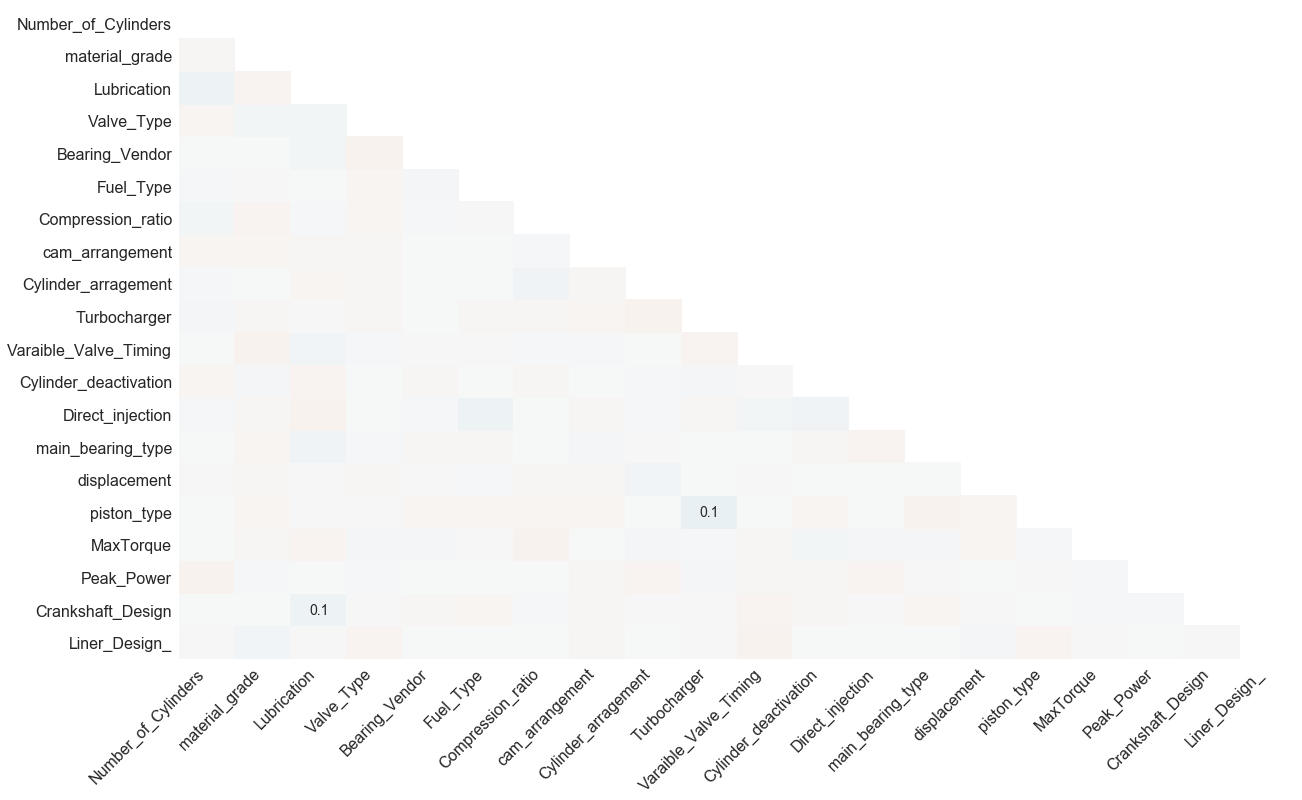

In [23]:
#Identifying patterns in missing data

import missingno as msno
%matplotlib inline
msno.heatmap(data) 

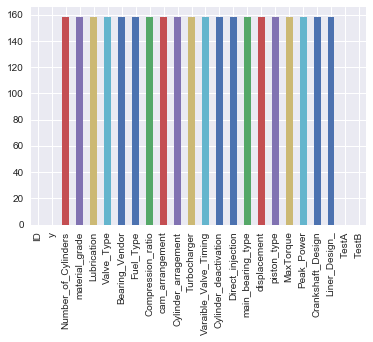

In [24]:
#Plotting the total number of missing values

data.isnull().sum().plot(kind='bar')

In [116]:
#Profile of data

import pandas_profiling

pandas_profiling.ProfileReport(data_imputed)

Number of variables,24
Number of observations,3156
Total Missing (%),0.0%
Total size in memory,95.2 KiB
Average record size in memory,30.9 B
Numeric,2
Categorical,22
Boolean,0
Date,0
Text (Unique),0
Rejected,0


##### Imputing data using KNN Imputation method

!pip install fancyimpute

In [28]:
import fancyimpute
from fancyimpute import KNN  

data_imputed = KNN(k=3).complete(data)

C:\Users\Mounika\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imputing row 1/3156 with 0 missing, elapsed time: 2.642
Imputing row 101/3156 with 3 missing, elapsed time: 2.657
Imputing row 201/3156 with 3 missing, elapsed time: 2.657
Imputing row 301/3156 with 1 missing, elapsed time: 2.657
Imputing row 401/3156 with 0 missing, elapsed time: 2.657
Imputing row 501/3156 with 2 missing, elapsed time: 2.657
Imputing row 601/3156 with 2 missing, elapsed time: 2.673
Imputing row 701/3156 with 1 missing, elapsed time: 2.673
Imputing row 801/3156 with 3 missing, elapsed time: 2.673
Imputing row 901/3156 with 2 missing, elapsed time: 2.673
Imputing row 1001/3156 with 0 missing, elapsed time: 2.673
Imputing row 1101/3156 with 0 missing, elapsed time: 2.689
Imputing row 1201/3156 with 2 missing, elapsed time: 2.689
Imputing row 1301/3156 with 2 missing, elapsed time: 2.689
Imputing row 1401/3156 with 0 missing, elapsed time: 2.689
Imputing row 1501/3156 with 0 missing, elapsed time: 2.704
Imputing row 1601/3156 with 0 missing, elapsed time: 2.704
Imputing 

In [29]:
pd.isna(data_imputed).sum()

0

In [30]:
data_imputed1 = data_imputed.round().astype('int')

In [31]:
data_imputed1

array([[   1,    1,    6, ...,    0,    1,    1],
       [   2,    0,    6, ...,    0,    1,    0],
       [   3,    1,    4, ...,    0,    1,    1],
       ...,
       [3154,    1,    4, ...,    0,    1,    0],
       [3155,    0,    6, ...,    1,    0,    1],
       [3156,    0,    8, ...,    0,    1,    0]])

In [32]:
data_imputed1.shape

(3156, 24)

In [33]:
data.columns

Index(['ID', 'y', 'Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation', 'Direct_injection',
       'main_bearing_type', 'displacement', 'piston_type', 'MaxTorque',
       'Peak_Power', 'Crankshaft_Design', 'Liner_Design_', 'TestA', 'TestB'],
      dtype='object')

In [34]:
data.shape


(3156, 24)

In [35]:
data_imputed=pd.DataFrame(data_imputed1, columns=['ID', 'y', 'Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation', 'Direct_injection',
       'main_bearing_type', 'displacement', 'piston_type', 'MaxTorque',
       'Peak_Power', 'Crankshaft_Design', 'Liner_Design_','TestA','TestB'])

In [36]:
data_imputed.head()

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,1,1,6,0,3,2,3,0,1,1,...,1,1,0,0,0,0,1,0,1,1
1,2,0,6,1,3,2,2,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,3,1,4,4,2,3,1,0,0,1,...,1,1,0,0,0,0,0,0,1,1
3,4,1,4,5,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,1,1
4,5,0,8,3,1,2,1,0,0,1,...,1,1,0,0,0,0,0,1,0,1


In [37]:
pd.isna(data_imputed).sum()

ID                       0
y                        0
Number_of_Cylinders      0
material_grade           0
Lubrication              0
Valve_Type               0
Bearing_Vendor           0
Fuel_Type                0
Compression_ratio        0
cam_arrangement          0
Cylinder_arragement      0
Turbocharger             0
Varaible_Valve_Timing    0
Cylinder_deactivation    0
Direct_injection         0
main_bearing_type        0
displacement             0
piston_type              0
MaxTorque                0
Peak_Power               0
Crankshaft_Design        0
Liner_Design_            0
TestA                    0
TestB                    0
dtype: int64

In [38]:
data_imputed.dtypes

ID                       int32
y                        int32
Number_of_Cylinders      int32
material_grade           int32
Lubrication              int32
Valve_Type               int32
Bearing_Vendor           int32
Fuel_Type                int32
Compression_ratio        int32
cam_arrangement          int32
Cylinder_arragement      int32
Turbocharger             int32
Varaible_Valve_Timing    int32
Cylinder_deactivation    int32
Direct_injection         int32
main_bearing_type        int32
displacement             int32
piston_type              int32
MaxTorque                int32
Peak_Power               int32
Crankshaft_Design        int32
Liner_Design_            int32
TestA                    int32
TestB                    int32
dtype: object

In [39]:
#Converting int to categorical types

cols = ['material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
      'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_','TestA','TestB','y']

for c in cols:
    data_imputed[c] = data_imputed[c].astype('category')

In [40]:
data_imputed.dtypes

ID                          int32
y                        category
Number_of_Cylinders         int32
material_grade           category
Lubrication              category
Valve_Type               category
Bearing_Vendor           category
Fuel_Type                category
Compression_ratio        category
cam_arrangement          category
Cylinder_arragement      category
Turbocharger             category
Varaible_Valve_Timing    category
Cylinder_deactivation    category
Direct_injection         category
main_bearing_type        category
displacement             category
piston_type              category
MaxTorque                category
Peak_Power               category
Crankshaft_Design        category
Liner_Design_            category
TestA                    category
TestB                    category
dtype: object

In [41]:
data_imputed.head()

,ID,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,1,1,6,0,3,2,3,0,1,1,...,1,1,0,0,0,0,1,0,1,1
1,2,0,6,1,3,2,2,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,3,1,4,4,2,3,1,0,0,1,...,1,1,0,0,0,0,0,0,1,1
3,4,1,4,5,1,3,1,0,1,1,...,1,1,0,0,0,0,0,0,1,1
4,5,0,8,3,1,2,1,0,0,1,...,1,1,0,0,0,0,0,1,0,1


In [31]:
#Imputing missing values

#imputed_data = data.fillna(method='ffill')

In [32]:
#pd.isna(imputed_data).sum()

ID                       0
y                        0
Number_of_Cylinders      0
material_grade           0
Lubrication              0
Valve_Type               0
Bearing_Vendor           0
Fuel_Type                0
Compression_ratio        0
cam_arrangement          0
Cylinder_arragement      0
Turbocharger             0
Varaible_Valve_Timing    0
Cylinder_deactivation    0
Direct_injection         0
main_bearing_type        0
displacement             0
piston_type              0
MaxTorque                0
Peak_Power               0
Crankshaft_Design        0
Liner_Design_            0
TestA                    0
TestB                    0
dtype: int64

In [42]:
#Dropping the ID column(as it doesn't add any value to the model)

data_final = data_imputed.drop('ID',axis=1)

data_final.head()

,y,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,Cylinder_arragement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,1,6,0,3,2,3,0,1,1,1,...,1,1,0,0,0,0,1,0,1,1
1,0,6,1,3,2,2,0,0,1,1,...,1,1,0,0,0,0,0,0,1,0
2,1,4,4,2,3,1,0,0,1,1,...,1,1,0,0,0,0,0,0,1,1
3,1,4,5,1,3,1,0,1,1,1,...,1,1,0,0,0,0,0,0,1,1
4,0,8,3,1,2,1,0,0,1,1,...,1,1,0,0,0,0,0,1,0,1


In [148]:
class_count = pd.crosstab(index=data_final["y"],  # Make a crosstab
                              columns="count")
print(class_count)  #There is no class imbalance
?class_count.hist()

col_0  count
y           
0       1528
1       1628


In [91]:
data_final.columns

Index(['y', 'Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation', 'Direct_injection',
       'main_bearing_type', 'displacement', 'piston_type', 'MaxTorque',
       'Peak_Power', 'Crankshaft_Design', 'Liner_Design_', 'TestA', 'TestB'],
      dtype='object')

In [142]:
#Number of engines that passed both TestA and the final bench test

len(data_final[(data_final['TestA']== 1) & (data_final['y'] == 1)])

1197

In [144]:
#Number of engines that passed both TestB and the final bench test

len(data_final[(data_final['TestB']== 1) & (data_final['y'] == 1)])

1229

In [145]:
#Number of engines that passed TestA,TestB and the final bench test


len(data_final[(data_final['TestA']== 1) & (data_final['TestB']== 1) & (data_final['y'] == 1)])

798

##### Plotting visualisations

In [90]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


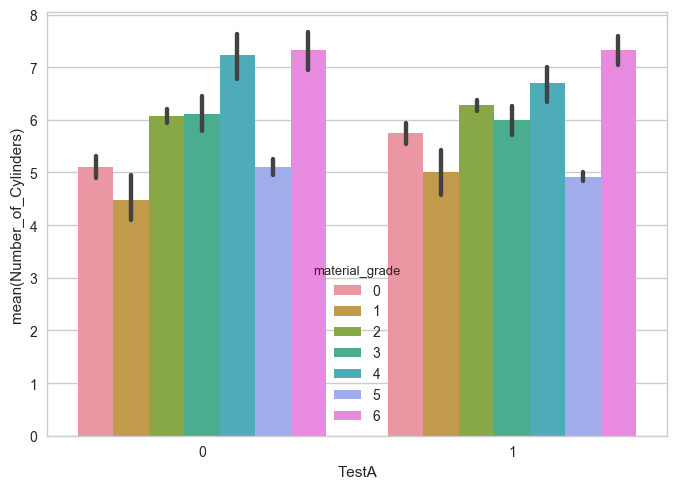

In [103]:
#Analysing the effect of Number of Cylinders and material grade on TestA results

sns.barplot(x="TestA", y="Number_of_Cylinders",hue="material_grade",data=data_final)

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


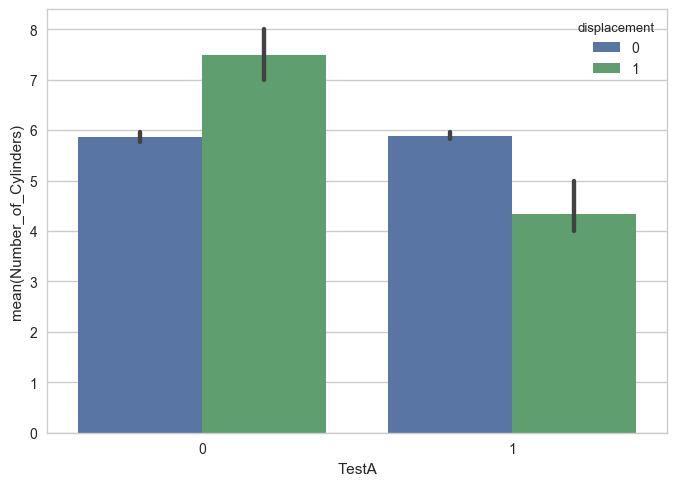

In [104]:
#Analysing the effect of Number of Cylinders and displacement on TestA results

sns.barplot(x="TestA", y="Number_of_Cylinders",hue="displacement",data=data_final)

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


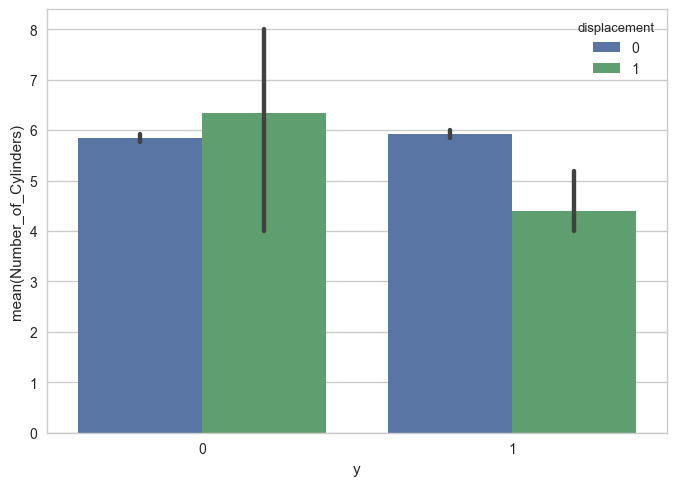

In [105]:
#Analysing the effect of Number of Cylinders and displacement on final bench test results

sns.barplot(x="y", y="Number_of_Cylinders",hue="displacement",data=data_final)

C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


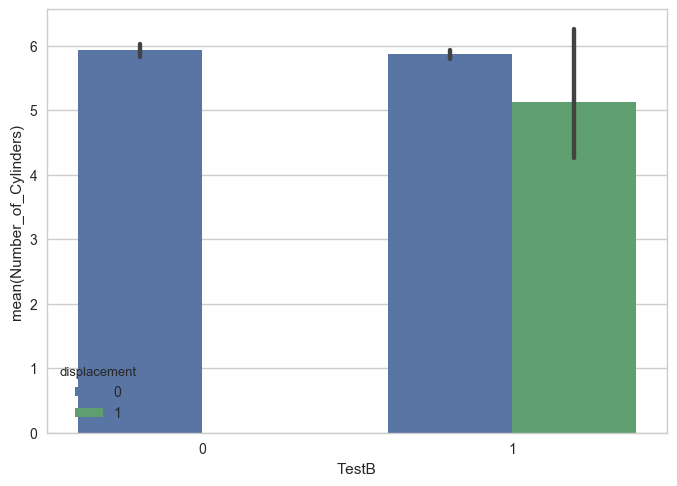

In [107]:
#Analysing the effect of Number of Cylinders and displacement on TestB results

sns.barplot(x="TestB", y="Number_of_Cylinders",hue="displacement",data=data_final)

In [44]:
#Preparing train data

train_data = data_final[['Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_',
       'TestA', 'TestB','y']]

In [45]:
train_data.columns

Index(['Number_of_Cylinders', 'material_grade', 'Lubrication', 'Valve_Type',
       'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio', 'cam_arrangement',
       'Cylinder_arragement', 'Turbocharger', 'Varaible_Valve_Timing',
       'Cylinder_deactivation', 'Direct_injection', 'main_bearing_type',
       'displacement', 'piston_type', 'MaxTorque', 'Peak_Power',
       'Crankshaft_Design', 'Liner_Design_', 'TestA', 'TestB', 'y'],
      dtype='object')

In [125]:
#Splitting data into train and validation

from sklearn.cross_validation import train_test_split

feature_cols = ['Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_',
       'TestA', 'TestB']
X = train_data[feature_cols]
y = train_data.y
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)

##### Building SVM Model using Cross Validation

In [155]:
from sklearn import svm
from sklearn.cross_validation import cross_val_score,cross_val_predict
model = svm.SVC(kernel = 'linear',gamma=0.1)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.00)


In [156]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.00)


In [68]:
predictions = cross_val_predict(model, X, y, cv=10)

In [149]:

model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [152]:
svm_predictions = model.predict(X_validation)

##### Evaluating the model

In [153]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, svm_predictions))

0.8504435994930292


In [154]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_validation, svm_predictions))

[[337  67]
 [ 51 334]]


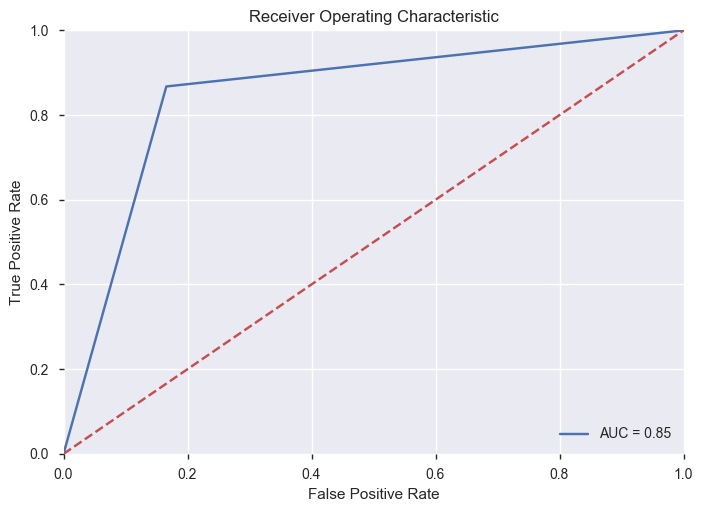

In [160]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_validation, svm_predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [84]:
#Implementing Random Forest Classifier

from sklearn.ensemble import RandomForestRegressor

#Instantiate the model with 1000 decision trees

rf = RandomForestRegressor(n_estimators=10000,random_state = 42)

In [121]:
rf_predictions = cross_val_predict(rf, X, y, cv=10)

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()

In [126]:
#Training the model

rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [127]:
# Use the forest's predict method on the test data
y_pred_rf = rf.predict(X_validation)

In [128]:
print(metrics.accuracy_score(y_validation, y_pred_rf.round()))



0.8415716096324461


In [129]:
for name, importance in zip(train_data[feature_cols], rf.feature_importances_):
    print(name, "=", importance)

Number_of_Cylinders = 0.035601765156872064
material_grade = 0.049350909765997326
Lubrication = 0.05843907482156898
Valve_Type = 0.061539865955007225
Bearing_Vendor = 0.06860831346718148
Fuel_Type = 0.061670147027080485
Compression_ratio = 0.025249909408490014
cam_arrangement = 0.006357004665355695
Cylinder_arragement = 0.012783637473204306
Turbocharger = 0.003128366116897958
Varaible_Valve_Timing = 0.0001147838558121566
Cylinder_deactivation = 0.10189556964642574
Direct_injection = 0.011704559417605455
main_bearing_type = 6.871678220363127e-06
displacement = 0.0023150806148590137
piston_type = 0.0013364364959990648
MaxTorque = 0.0028449319004045432
Peak_Power = 0.1151562132581914
Crankshaft_Design = 0.012152247726304608
Liner_Design_ = 0.020225023100316913
TestA = 0.15910423295492146
TestB = 0.1904150554932834


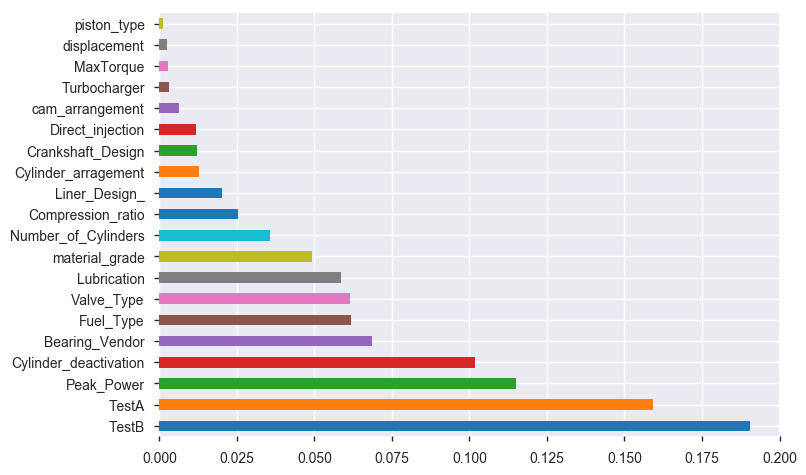

In [131]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [132]:
features = ['Liner_Design_','Compression_ratio','Number_of_Cylinders','material_grade','Valve_Type','Lubrication','Fuel_Type',
           'Bearing_Vendor','Cylinder_deactivation','Peak_Power','TestA','TestB']

In [133]:
traindata = data_final[feature_cols]
X = train_data[feature_cols]
y = train_data.y
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)

In [134]:
#Fit the SVM Model
from sklearn import svm

svmrf = svm.SVC(kernel = 'linear')
svmrf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
# Use the svm's predict method on the test data
y_pred_svmrf = svmrf.predict(X_validation)

In [136]:
print(metrics.accuracy_score(y_validation, y_pred_svmrf))

0.8504435994930292


In [194]:
# fit model to training data
#from xgboost import XGBClassifier

#model = XGBClassifier()
#model.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'

In [193]:
#!pip install xgboost

No files/directories in C:\Users\Mounika\AppData\Local\Temp\pip-build-om3o3a7w\xgboost\pip-egg-info (from PKG-INFO)


In [201]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline


pca = PCA(n_components=21)

independent = pca.fit_transform(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [197]:
var1

array([25.57, 48.41, 68.27, 77.78, 86.95, 89.62, 92.  , 93.69, 95.03,
       96.24, 97.28, 98.02, 98.69, 99.27, 99.51, 99.71, 99.85, 99.94,
       99.96, 99.98, 99.99])

In [205]:
principalcomp.shape

(3156, 21)

In [206]:
X_train_pca = pca.fit_transform(X_train)
y_train_pca = pca.fit_transform(y_train)

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\decomposition\pca.py:398: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [235]:
model.fit(X_train[18:],y_train[18:])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [236]:
y_pred = model.predict(X_validation)

In [237]:
print(metrics.accuracy_score(y_validation, y_pred))

0.8504435994930292


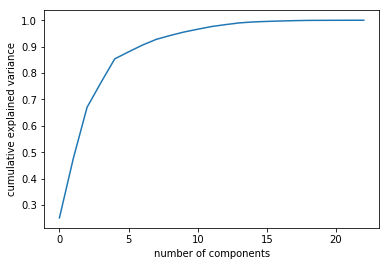

In [238]:
pca = PCA().fit(train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_class))

##### Hyper Parameter Tuning for SVM

In [44]:
from sklearn.grid_search import GridSearchCV

svc = svm.SVC()
 
param_grid = { 
           "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "C" : .

C:\Users\Mounika\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


In [62]:
from sklearn import svm

svmgrid = svm.SVC(kernel = 'linear',C=1,gamma=0.1)
svmgrid.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
# Use the svm's predict method on the test data
y_pred_svmgrid = svmgrid.predict(X_validation)

In [64]:
print(metrics.accuracy_score(y_validation, y_pred_svmgrid))

0.8504435994930292



### PreProcessing Test Data

In [48]:
#Reading Test Data

test_data = pd.read_csv('Test.csv')

In [49]:
#Shape of test data

test_data.shape

(1053, 21)

In [50]:
#Datatypes of test data

test_data.dtypes

ID                               int64
Number of Cylinders            float64
material grade                  object
Lubrication                     object
Valve Type                      object
Bearing Vendor                  object
Fuel Type                       object
Compression ratio               object
cam arrangement                 object
Cylinder arragement             object
Turbocharger                    object
Varaible Valve Timing (VVT)     object
Cylinder deactivation           object
Direct injection                object
main bearing type               object
displacement                    object
piston type                     object
Max. Torque                     object
Peak Power                      object
Crankshaft Design               object
Liner Design                    object
dtype: object

In [51]:
#Replacing spaces between column names with underscore

test_data.columns = [c.replace(' ', '_') for c in test_data.columns]


In [52]:
#Checking for missing values

pd.isna(test_data).sum()

ID                              0
Number_of_Cylinders            53
material_grade                 53
Lubrication                    53
Valve_Type                     53
Bearing_Vendor                 53
Fuel_Type                      53
Compression_ratio              53
cam_arrangement                53
Cylinder_arragement            53
Turbocharger                   53
Varaible_Valve_Timing_(VVT)    53
Cylinder_deactivation          53
Direct_injection               53
main_bearing_type              53
displacement                   53
piston_type                    53
Max._Torque                    53
Peak_Power                     53
Crankshaft_Design              53
Liner_Design_                  53
dtype: int64

In [53]:
#Renaming the column names

test_data = test_data.rename(columns = {"Varaible_Valve_Timing_(VVT)":"Varaible_Valve_Timing"})

test_data = test_data.rename(columns = {"Max._Torque":"MaxTorque"})

#Imputing missing values
test_data = test_data.fillna(method='ffill')

pd.isna(test_data).sum()

In [54]:
test_data.dtypes

ID                         int64
Number_of_Cylinders      float64
material_grade            object
Lubrication               object
Valve_Type                object
Bearing_Vendor            object
Fuel_Type                 object
Compression_ratio         object
cam_arrangement           object
Cylinder_arragement       object
Turbocharger              object
Varaible_Valve_Timing     object
Cylinder_deactivation     object
Direct_injection          object
main_bearing_type         object
displacement              object
piston_type               object
MaxTorque                 object
Peak_Power                object
Crankshaft_Design         object
Liner_Design_             object
dtype: object

In [55]:
#Converting objects to categorical types

obj_cols = ['material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_']

for c in obj_cols:
    test_data[c] = test_data[c].astype('category')
    test_data[c] = test_data[c].cat.codes


In [56]:
#Replacing -1 as NaN

import numpy as np
test_data = test_data.replace(-1,np.nan)


In [57]:
#Reading additional test data

additional_test_data = pd.read_csv('Test_AdditionalData.csv')

In [58]:
#Attaching additional data

test_data['TestA'] = test_data.ID.isin(additional_test_data.TestA).astype(np.int64)

test_data['TestB'] = test_data.ID.isin(additional_test_data.TestB).astype(np.int64)

In [59]:
test_data.head()

,ID,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,Cylinder_arragement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,5001,4.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,5002,8.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
2,5003,8.0,NaN,0.0,1.0,2.0,0.0,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,5004,8.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
4,5005,4.0,5.0,NaN,3.0,4.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [60]:
test_data_imputed = KNN(k=3).complete(test_data)

Imputing row 1/1053 with 1 missing, elapsed time: 0.375
Imputing row 101/1053 with 1 missing, elapsed time: 0.375
Imputing row 201/1053 with 1 missing, elapsed time: 0.375
Imputing row 301/1053 with 0 missing, elapsed time: 0.391
Imputing row 401/1053 with 1 missing, elapsed time: 0.391
Imputing row 501/1053 with 1 missing, elapsed time: 0.391
Imputing row 601/1053 with 1 missing, elapsed time: 0.391
Imputing row 701/1053 with 1 missing, elapsed time: 0.391
Imputing row 801/1053 with 0 missing, elapsed time: 0.391
Imputing row 901/1053 with 3 missing, elapsed time: 0.406
Imputing row 1001/1053 with 1 missing, elapsed time: 0.406


In [61]:
test_data_imputed1 = test_data_imputed.round().astype('int')

In [62]:
test_data_imputed=pd.DataFrame(test_data_imputed1, columns=['ID','Number_of_Cylinders', 'material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
       'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation', 'Direct_injection',
       'main_bearing_type', 'displacement', 'piston_type', 'MaxTorque',
       'Peak_Power', 'Crankshaft_Design', 'Liner_Design_','TestA','TestB'])


In [63]:
cols = ['material_grade', 'Lubrication',
       'Valve_Type', 'Bearing_Vendor', 'Fuel_Type', 'Compression_ratio',
      'cam_arrangement', 'Cylinder_arragement', 'Turbocharger',
       'Varaible_Valve_Timing', 'Cylinder_deactivation',
       'Direct_injection', 'main_bearing_type', 'displacement', 'piston_type',
       'MaxTorque', 'Peak_Power', 'Crankshaft_Design', 'Liner_Design_','TestA','TestB']
for c in cols:
    test_data_imputed[c] = test_data_imputed[c].astype('category')

In [64]:
test_data_imputed.head()

,ID,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,Cylinder_arragement,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,5001,4,4,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,1
1,5002,8,4,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,5003,8,3,0,1,2,0,0,1,1,...,1,0,0,0,0,0,0,1,1,1
3,5004,8,2,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
4,5005,4,5,0,3,4,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [65]:
testdata = test_data_imputed.drop('ID',axis=1)
testdata.head()

,Number_of_Cylinders,material_grade,Lubrication,Valve_Type,Bearing_Vendor,Fuel_Type,Compression_ratio,cam_arrangement,Cylinder_arragement,Turbocharger,...,Direct_injection,main_bearing_type,displacement,piston_type,MaxTorque,Peak_Power,Crankshaft_Design,Liner_Design_,TestA,TestB
0,4,4,0,0,1,0,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
1,8,4,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,8,3,0,1,2,0,0,1,1,1,...,1,0,0,0,0,0,0,1,1,1
3,8,2,0,0,1,0,0,1,1,1,...,1,0,0,0,0,1,0,1,1,0
4,4,5,0,3,4,1,0,1,1,1,...,1,0,0,0,0,0,0,0,1,0


In [66]:
testdata.dtypes

Number_of_Cylinders         int32
material_grade           category
Lubrication              category
Valve_Type               category
Bearing_Vendor           category
Fuel_Type                category
Compression_ratio        category
cam_arrangement          category
Cylinder_arragement      category
Turbocharger             category
Varaible_Valve_Timing    category
Cylinder_deactivation    category
Direct_injection         category
main_bearing_type        category
displacement             category
piston_type              category
MaxTorque                category
Peak_Power               category
Crankshaft_Design        category
Liner_Design_            category
TestA                    category
TestB                    category
dtype: object

In [220]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [221]:
#Recoding the test predictions

test_predictions = coding(pred, {1:'pass',0:'fail'})

In [223]:
#Writing the predictions to a csv file

pred = pd.DataFrame(test_predictions)
id = test_data.ID
id = pd.DataFrame(id)
df = pd.concat([id,pred], axis=1)
df.to_csv('SVMPred.csv')

In [ ]:
#Predicting on test data using Random Forest

y_rf = model.predict(test_data)
y_rf_pred = y_rf.round()

In [ ]:
#Recoding the test predictions

test_predictions = coding(y_rf, {1:'pass',0:'fail'})

In [ ]:
#Writing the predictions to a csv file

pred = pd.DataFrame(test_predictions)
id = test_data.ID
id = pd.DataFrame(id)
df = pd.concat([id,pred], axis=1)
df.to_csv('RFPredictions.csv')